In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style

from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn import neighbors
from sklearn.metrics.pairwise import pairwise_distances

from mpl_toolkits.mplot3d import Axes3D

In [12]:
data=pd.read_csv("datos PIDA.csv", sep=";", decimal=",", encoding="latin_1")

In [13]:
data

,Nombre,Descripción,Tipo de datos,Tipo de información,Valor para anticorrupción,Existe en Colombia,Enlace,Entidad productora
0,Registro de cabilderos,Datos que permiten identificar y describir a l...,Registro,Individuos/organizaciones,"Prevención,Detección",No,NaN,Congreso de la República
1,Declaración de Intereses,Repositorio de datos con información suficient...,Registro,Individuos/organizaciones,"Detección,Investigación",Parcial,NaN,SIGEP (Información dervidada del formato de bi...
2,Registro de compañías,Conjunto de datos que identifica a todas las e...,Registro,Individuos/organizaciones,"Detección,Investigación",Si,https://datos.gov.co/browse?q=SECTOR%20REAL&so...,Superintendencia de Sociedades
3,Registro de organizaciones benéficas,Repositorio de datos sobre cada organización b...,Registro,Individuos/organizaciones,"Detección,Investigación",Parcial,http://secretariageneral.gov.co/transparencia/...,DIAN - Entidades sin ánimo de lucro régimen tr...
4,Servidores públicos que intervienen en proceso...,"Lista de puestos dentro del gobierno que, en f...",Registro,Individuos/organizaciones,"Prevención,Detección",No,NaN,DAFP
5,Personas políticamente expuestas,NaN,Registro,Individuos/organizaciones,"Prevención,Detección",NaN,NaN,NaN
6,Registro servidores públicos,Una lista de individuos a quienes se les ha co...,Registro,Individuos/organizaciones,"Prevención,Detección",No,NaN,DAFP -SIGEP
7,Lista de contratistas de gobierno,Registro de todos los contratistas que tienen ...,Registro,Individuos/organizaciones,"Detección,Prevención,Investigación",Si,https://www.datos.gov.co/Gastos-Gubernamentale...,Colombia Compra Eficiente \nSIGEP
8,Consejos consultivos de gobierno,Repositorio de datos que identifica cada conse...,Registro,Individuos/organizaciones,"Prevención,Detección",Parcial,NaN,Presidencia\nSIGEP
9,Financiamiento a partidos políticos,Repositorio de datos que permite identificar l...,Divulgación pública,Recursos públicos,"Prevención,Detección,Investigación",No,NaN,Consejo Nacional Electoral


In [14]:
ids=pd.DataFrame(data.dtypes)
ids.columns=(["dtype"])
ids["valores_unicos"]=[len(set(data[name]))for name in data.columns]
ids["cant_datos"]=[(28-sum(data[name].isna()))for name in data.columns]

In [15]:
ids

,dtype,valores_unicos,cant_datos
Nombre,object,28,28
Descripción,object,28,27
Tipo de datos,object,3,28
Tipo de información,object,4,28
Valor para anticorrupción,object,5,28
Existe en Colombia,object,4,27
Enlace,object,10,10
Entidad productora,object,26,26


# Preprocesamiento
1. valor para anticorrupción: separar valores y codificar dummy
2. codificar dummy para :
    - Tipo de datos
    - Tipo de información
    - Existe en colombia

In [16]:
anticorr=pd.get_dummies(data["Valor para anticorrupción"].str.split(",", n=-1,expand=True))
anticorr["anticorrupción_Detección"]=anticorr["0_Detección"]+anticorr["1_Detección"]
anticorr["anticorrupción_Prevención"]=anticorr["0_Prevención"]+anticorr["1_Prevención"]
anticorr["anticorrupción_Investigación"]=anticorr["2_Investigación"]+anticorr["1_Investigación"]
anticorr["anticorrupción_Sanción"]=anticorr["2_Sanción"]
# anticorr

In [17]:
# data.columns
dummies_1=pd.get_dummies(data[['Tipo de datos','Tipo de información','Existe en Colombia']])

In [18]:
encoded=pd.concat([data[["Nombre","Descripción","Entidad productora"]],
                   anticorr[["anticorrupción_Detección",
                             "anticorrupción_Prevención",
                             "anticorrupción_Investigación",
                             "anticorrupción_Sanción"]],
                   dummies_1], axis=1)

In [19]:
encoded=encoded.drop(['Existe en Colombia_No'],axis=1)
encoded["Enlace"]=data.Enlace.notnull()*1

In [20]:
encoded.to_csv("codificadas.csv")

In [22]:
encoded

,Nombre,Descripción,Entidad productora,anticorrupción_Detección,anticorrupción_Prevención,anticorrupción_Investigación,anticorrupción_Sanción,Tipo de datos_Divulgación pública,Tipo de datos_Registro,Tipo de datos_Transacción,Tipo de información_Extracción de rentas,Tipo de información_Individuos/organizaciones,Tipo de información_Recursos públicos,Tipo de información_Regulación,Existe en Colombia_Parcial,Existe en Colombia_Si,Enlace
0,Registro de cabilderos,Datos que permiten identificar y describir a l...,Congreso de la República,1,1,0,0,0,1,0,0,1,0,0,0,0,0
1,Declaración de Intereses,Repositorio de datos con información suficient...,SIGEP (Información dervidada del formato de bi...,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2,Registro de compañías,Conjunto de datos que identifica a todas las e...,Superintendencia de Sociedades,1,0,1,0,0,1,0,0,1,0,0,0,1,1
3,Registro de organizaciones benéficas,Repositorio de datos sobre cada organización b...,DIAN - Entidades sin ánimo de lucro régimen tr...,1,0,1,0,0,1,0,0,1,0,0,1,0,1
4,Servidores públicos que intervienen en proceso...,"Lista de puestos dentro del gobierno que, en f...",DAFP,1,1,0,0,0,1,0,0,1,0,0,0,0,0
5,Personas políticamente expuestas,NaN,NaN,1,1,0,0,0,1,0,0,1,0,0,0,0,0
6,Registro servidores públicos,Una lista de individuos a quienes se les ha co...,DAFP -SIGEP,1,1,0,0,0,1,0,0,1,0,0,0,0,0
7,Lista de contratistas de gobierno,Registro de todos los contratistas que tienen ...,Colombia Compra Eficiente \nSIGEP,1,1,1,0,0,1,0,0,1,0,0,0,1,1
8,Consejos consultivos de gobierno,Repositorio de datos que identifica cada conse...,Presidencia\nSIGEP,1,1,0,0,0,1,0,0,1,0,0,1,0,0
9,Financiamiento a partidos políticos,Repositorio de datos que permite identificar l...,Consejo Nacional Electoral,1,1,1,0,1,0,0,0,0,1,0,0,0,0


# Redes Entidades

In [24]:
data2=pd.read_csv("PIDA_2.csv", sep=";", decimal=",", encoding="latin_1")

In [26]:
ids2=pd.DataFrame(data2.dtypes)
ids2.columns=(["dtype"])
ids2["valores_unicos"]=[len(set(data2[name]))for name in data.columns]
ids2["cant_datos"]=[(28-sum(data2[name].isna()))for name in data.columns]

In [27]:
ids2

,dtype,valores_unicos,cant_datos
Nombre,object,18,27
Descripción,object,18,27
Tipo de datos,object,4,27
Tipo de información,object,5,27
Valor para anticorrupción,object,5,27
Existe en Colombia,object,3,27
Enlace,object,11,14
Entidad productora,object,24,27


In [33]:
antic=pd.get_dummies(data2["Valor para anticorrupción"].str.split(",", n=-1,expand=True))
antic["anticorrupción_Detección"]=antic["0_Detección"]+antic["1_Detección"]
antic["anticorrupción_Prevención"]=antic["0_Prevención"]+antic["1_Prevención"]
antic["anticorrupción_Investigación"]=antic["2_Investigación"]+antic["1_Investigación"]
antic["anticorrupción_Sanción"]=antic["2_Sanción"]
# antic

In [31]:
dummies_2=pd.get_dummies(data2[['Tipo de datos','Tipo de información','Existe en Colombia']])

In [32]:
encoded2=pd.concat([data2[["Nombre","Descripción","Entidad productora"]],
                   antic[["anticorrupción_Detección",
                             "anticorrupción_Prevención",
                             "anticorrupción_Investigación",
                             "anticorrupción_Sanción"]],
                   dummies_2], axis=1)

In [67]:
encoded2.to_csv("codificadas_entidades.csv")
encoded2.columns

Index(['Nombre', 'Descripción', 'Entidad productora',
       'anticorrupción_Detección', 'anticorrupción_Prevención',
       'anticorrupción_Investigación', 'anticorrupción_Sanción',
       'Tipo de datos_Divulgación pública', 'Tipo de datos_Registro',
       'Tipo de datos_Transacción', 'Tipo de información_Extracción de rentas',
       'Tipo de información_Individuos/organizaciones',
       'Tipo de información_Recursos públicos',
       'Tipo de información_Regulación', 'Existe en Colombia_Parcial',
       'Existe en Colombia_Si'],
      dtype='object')

In [40]:
encoded2["Entidad productora"].value_counts()[:5]

SIGEP                            5
Colombia Compra Eficiente        4
DNP                              2
Senado de la República           2
Fiscalía General de la Nación    2
Name: Entidad productora, dtype: int64

In [62]:
entidades_dat=encoded2.iloc[:,2:].groupby(['Entidad productora']).sum()#.T

In [63]:
contacts_ward=hierarchy.linkage(entidades_dat, 'ward')
# encoded2.iloc[:,2:].groupby(['Entidad productora']).sum().T

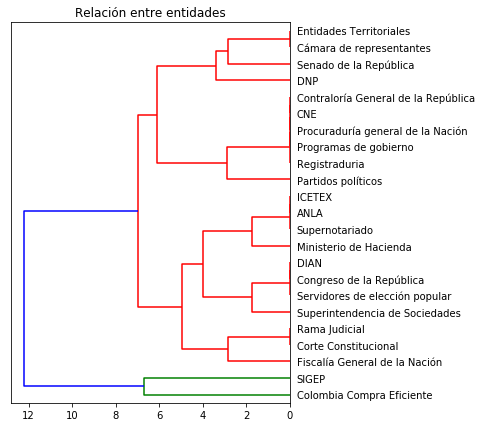

In [73]:
plt.figure(figsize=(5,7))
dn_tf = hierarchy.dendrogram(contacts_ward,labels=entidades_dat.index,orientation="left")
plt.title('Relación entre entidades')
plt.show()

In [76]:
entidades_dat.sum(axis=1).sort_values(ascending=False)

Entidad productora
SIGEP                                  26
Colombia Compra Eficiente              21
Fiscalía General de la Nación          12
Senado de la República                 11
DNP                                    10
Partidos políticos                     10
Rama Judicial                           6
Corte Constitucional                    6
Supernotariado                          5
CNE                                     5
Congreso de la República                5
Contraloría General de la República     5
Cámara de representantes                5
DIAN                                    5
ICETEX                                  5
Entidades Territoriales                 5
Superintendencia de Sociedades          5
Ministerio de Hacienda                  5
Procuraduría general de la Nación       5
Programas de gobierno                   5
Registraduria                           5
Servidores de elección popular          5
ANLA                                    5
dtype: int64

In [77]:
spect_emb_2d=manifold.SpectralEmbedding(n_components=2).fit_transform(entidades_dat)

C:\Users\Alexis\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


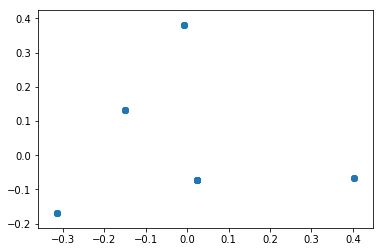

In [81]:
plt.scatter(spect_emb_2d[:,0],spect_emb_2d[:,1])